# Linear Regression

## Import dependencies 

In [1]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib as mpl, matplotlib.pyplot as plt
print(f"np: {np.__version__}\npd: {pd.__version__}\nmpl: {mpl.__version__}\nplt: {plt}\n")

np: 1.20.3
pd: 1.3.4
mpl: 3.4.3
plt: <module 'matplotlib.pyplot' from 'C:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>



## Read data for part 1

#### For part 1, we are given population and profits for 97 cities. We want to use population (feature) to predict profit (prediction) 

In [2]:
data_1 = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
data_1.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Plotting data... 

In [3]:
X = data_1[data_1.columns[:-1]]
y = data_1[['profit']]
m = len(y)  # should be 97
# print(m)
# display(X)
# display(y)

In [4]:
def plot_data(x, y):
    my_fig = plt.figure(num=1)
    plt.plot(x, y, 'rx', markersize=10)
    plt.xlabel("Population in 10,000's")
    plt.ylabel("Profit in $10,000's")
    plt.title('Profit vs Population')
    
    return my_fig

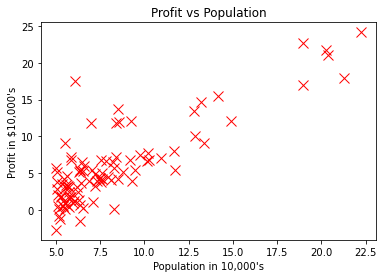

In [5]:
figure_1 = plot_data(X, y)

## Cost Function & Gradient Descent...

In [6]:
# add ones column to X
X = pd.concat([pd.DataFrame(np.ones((m)), columns=['X0']), X], axis=1)
# display(X)

In [7]:
# initialize weights / fitting parameters
theta = pd.DataFrame(np.zeros((2, 1)), index=X.columns, columns=['parameters'])
# display(theta)

In [8]:
# gradient descent settings
iterations = 1500
alpha = 0.01 # learning rate

In [9]:
# Compute cost
def compute_cost(X, y, theta) -> int:
    # X = m x n matrix
    # y = m x 1 matrix
    # theta = n x 1 matrix
    J = (1/(2*m)) * np.sum((np.matmul(X, theta) - y) ** 2)
#     print(f"J = {J} \nTheta = \n{theta}\n")
    return J

In [10]:
J = compute_cost(X.to_numpy(copy=True), y.to_numpy(copy=True), theta.to_numpy(copy=True))
# Expected cost value (approx) 32.07

In [11]:
# test on another set of parameters
theta_2 = theta.copy()
theta_2.iloc[0] = -1
theta_2.iloc[1] = 2
# display(theta_2)

J_2 = compute_cost(X.to_numpy(copy=True), y.to_numpy(copy=True), theta_2.to_numpy(copy=True))
# Expected cost value (approx) 54.24

In [12]:
# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iters, theta_idx):
    m = len(y)
    J_history = np.zeros((num_iters, 1))

    for iter in range(num_iters):
        # single gradient descent step
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta -= alpha * gradient
        
        J_history[iter] = compute_cost(X, y, theta);
    
    theta = pd.DataFrame(theta, index=theta_idx, columns=['parameters'])
#     print(f"Theta found by gradient descent: {theta} \n")
    return theta, J_history

In [13]:
theta, J_history = gradient_descent(X.to_numpy(copy=True), y.to_numpy(copy=True), theta.to_numpy(copy=True), alpha, iterations, X.columns)

In [14]:
display(theta)
display(J_history)
# Expected theta values (approx)
# [-3.6303,  1.1664]

,parameters
X0,-3.630291
population,1.166362


array([[6.73719046],
       [5.93159357],
       [5.90115471],
       ...,
       [4.48343473],
       [4.48341145],
       [4.48338826]])

## Plot linear fit 

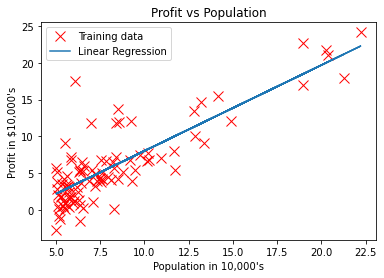

In [15]:
plt.figure(figure_1)  # brings out previous figure
plt.plot(X['population'], np.matmul(X.to_numpy(copy=True), theta.to_numpy(copy=True)), '-')
plt.legend(['Training data', 'Linear Regression'])

In [16]:
# predict values for population sizes of 35,000 and 70,000
predict_1 = np.matmul([1, 3.5], theta.to_numpy(copy=True))[0] * 10000
predict_2 = np.matmul([1, 7], theta.to_numpy(copy=True))[0] * 10000
print(f"For population of 35,000, we predict profit of: ${predict_1}\n")
print(f"For population of 70,000, we predict profit of: ${predict_2}\n")

For population of 35,000, we predict profit of: $4519.767867701776

For population of 70,000, we predict profit of: $45342.45012944714



## Visualizing J(theta_0, theta_1)

### Meshgrid (3d plot)

In [17]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Initialize J_vals to matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))  
# Fill up J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]], np.newaxis)
        J_vals[i, j] = compute_cost(X.to_numpy(copy=True), y.to_numpy(copy=True), t) / 100;  
        # somehow the J_values diff from octave

<IPython.core.display.Javascript object>


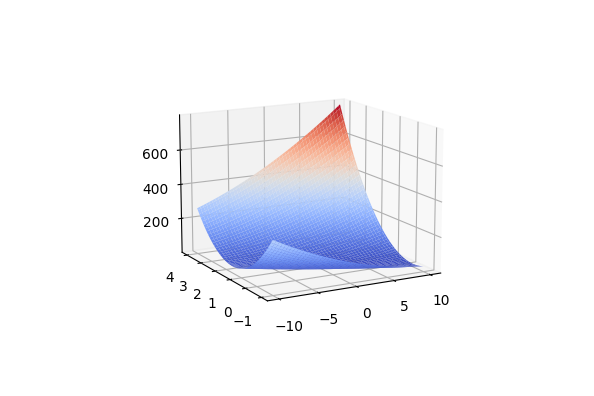

In [28]:
from matplotlib import cm
%matplotlib notebook

ax = plt.axes(projection='3d')
theta0_vals_copy, theta1_vals_copy = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(theta0_vals_copy, theta1_vals_copy, J_vals.T, cmap=cm.coolwarm)

plt.show()

### Contour plot (2d plot)

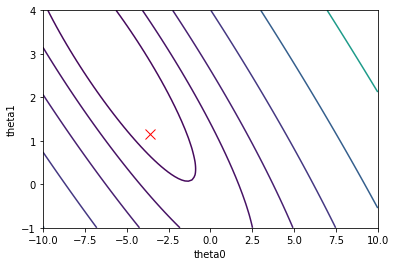

In [19]:
%matplotlib inline

plt.contour(theta0_vals_copy, theta1_vals_copy, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta.to_numpy(copy=True)[0], theta.to_numpy(copy=True)[1], 'rx', markersize=10, linewidth=2)